In [1]:
import csv
import json

# CSVファイルの読み込み
csv_file = '/root/dataset/SD_generated_dataset_checked/radiantLightV2_1/annotations/annotations.csv'
annotations = []
images = []
keypoints = []
image_id = 1

In [2]:


with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        image_name = "images/"+row[0]
        keypoints_original = [keypoint for keypoint in row[3:]]
        keypoints_converted = []
        # contours
        keypoints_converted += keypoints_original[0:66]
        # eyebrow右
        keypoints_converted += keypoints_original[66:76]
        # # eyebrow左
        keypoints_converted += keypoints_original[84:94]
        # # eye右
        keypoints_converted += keypoints_original[120:122]
        keypoints_converted += keypoints_original[124:126]
        keypoints_converted += keypoints_original[128:130]
        keypoints_converted += keypoints_original[130:132]
        keypoints_converted += keypoints_original[134:136]
        # # # eye左
        keypoints_converted += keypoints_original[136:138]
        keypoints_converted += keypoints_original[140:142]
        keypoints_converted += keypoints_original[144:146]
        keypoints_converted += keypoints_original[146:148]
        keypoints_converted += keypoints_original[150:152]
        # # # 鼻
        keypoints_converted += keypoints_original[102:120]
        # # 口
        keypoints_converted += keypoints_original[176:192]
        # # 右目
        keypoints_converted += keypoints_original[194:196]
        # # 左目
        keypoints_converted += keypoints_original[192:194]
        
        keypoints = []
        for num,val in enumerate(keypoints_converted):
            keypoints.append(float(val))
            if num % 2 == 1:
                keypoints.append(2)
        
        # COCO keypoints形式に変換
        annotation = {
            "id": image_id,
            "image_id": image_id,
            "category_id": 1,
            "segmentation": [],
            "area": 0,  # この値は適切に計算する必要があります
            "bbox": [0,0,512,512],  # この値はkeypointsから計算する必要があります
            "iscrowd": 0,
            "attributes": {
                "occluded": False
            },
            "keypoints": keypoints,
            "num_keypoints": len(keypoints) // 3  # x, y, visibilityの3要素が1つのkeypoint
        }
        annotations.append(annotation)

        image = {
            "id": image_id,
            "width": 512,  # この値は実際の画像のサイズに合わせて変更する必要があります
            "height": 512,  # この値は実際の画像のサイズに合わせて変更する必要があります
            "file_name": image_name,
            "license": 0,
            "flickr_url": "",
            "coco_url": "",
            "date_captured": 0
        }
        images.append(image)

        image_id += 1

# COCO形式のJSONデータを作成
coco_data = {
    "licenses": [
        {
            "name": "",
            "id": 0,
            "url": ""
        }
    ],
    "info": {
        "contributor": "",
        "date_created": "",
        "description": "",
        "url": "",
        "version": "",
        "year": ""
    },
    "categories": [
        {
            "id": 1,
            "name": "keypoints",
            "supercategory": "",
            "keypoints": [str(i) for i in range(1, 73)],
            "skeleton": []
        }
    ],
    "images": images,
    "annotations": annotations
}

# JSONファイルに書き込み
output_file = 'output_coco_format.json'
with open(output_file, 'w') as f:
    json.dump(coco_data, f, indent=4)

print(f"COCO Keypoints形式のデータを{output_file}に保存しました。")


COCO Keypoints形式のデータをoutput_coco_format.jsonに保存しました。


len(keypoints_original) 196
144
72.0


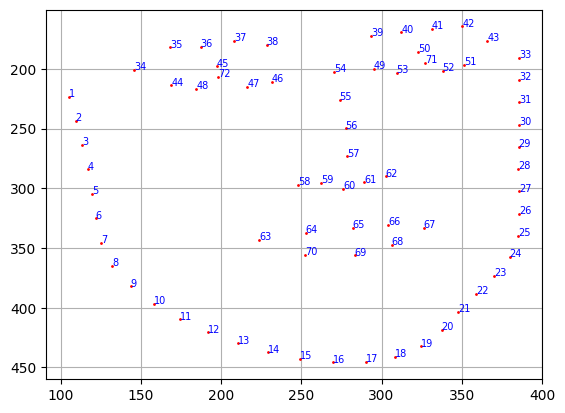

len(keypoints_original) 196
144
72.0


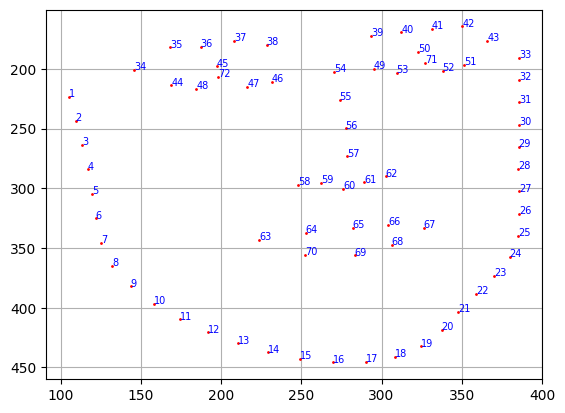

len(keypoints_original) 196
144
72.0


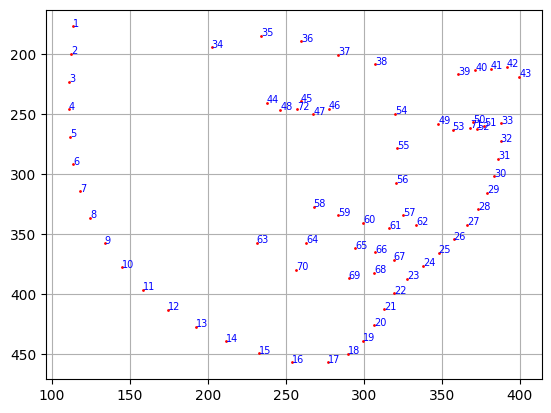

In [32]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


reader = pd.read_csv(csv_file).values.tolist()
for row in reader[0:3]:
    image_name = "images/"+row[0]
    keypoints_original = [keypoint for keypoint in row[3:]]
    print("len(keypoints_original)",len(keypoints_original))
    keypoints_converted = []
    # contours
    keypoints_converted += keypoints_original[0:66]
    # eyebrow右
    keypoints_converted += keypoints_original[66:76]
    # # eyebrow左
    keypoints_converted += keypoints_original[84:94]
    # # eye右
    keypoints_converted += keypoints_original[120:122]
    keypoints_converted += keypoints_original[124:126]
    keypoints_converted += keypoints_original[128:130]
    keypoints_converted += keypoints_original[130:132]
    keypoints_converted += keypoints_original[134:136]
    # # # eye左
    keypoints_converted += keypoints_original[136:138]
    keypoints_converted += keypoints_original[140:142]
    keypoints_converted += keypoints_original[144:146]
    keypoints_converted += keypoints_original[146:148]
    keypoints_converted += keypoints_original[150:152]
    # # # 鼻
    keypoints_converted += keypoints_original[102:120]
    # # 口
    keypoints_converted += keypoints_original[176:192]
    # # 右目
    keypoints_converted += keypoints_original[194:196]
    # # 左目
    keypoints_converted += keypoints_original[192:194]
    
    # print(keypoints_converted)
    # keypoints_converted += keypoints_original[0:64,66:76,84:94,102:120,120:134]
    
    
    
    print(len(keypoints_converted))
    print(len(keypoints_converted)/2)
    x_coordinates = keypoints_converted[0::2]
    y_coordinates = keypoints_converted[1::2]
    x_np = np.array(x_coordinates)
    y_np = np.array(y_coordinates)
    fig, ax = plt.subplots()
    for i in range(len(y_np)):
        ax.annotate(i+1, (x_np[i], y_np[i]),color="blue",fontsize = 7)
    
    
    ax.invert_yaxis()
    ax.plot(x_np, y_np, 'o',color='red',markersize=1) # 上右眉
    ax.grid()
    plt.show()
    # for num,val in enumerate(keypoints_original[0:65]):
    #     keypoints.append(float(val))
    #     if num % 2 == 1:
    #         keypoints.append(2)